# Identification of polluted samples in a dataset using Spectral Analysis

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### $\mathbf{Problem \ Statement}$

### The attached file, 'polluted_data.csv', contains the following data:

### A time series of intraday price values for an asset was split into half-hour intervals for a total of 1709 intervals. Therefore, there are 1709 lines in this file, one for each half-hour interval. Each line begins with the count of the corresponding half-hour

### The data was constructed as follows for each half hour interval $t$ :-  

#### Suppose that $p(t, k)$ denotes the price of the asset in minute $k$ of half-hour $t$.  Here $k = 0,1,\ldots, 29$.  

#### The data in position $k+1$ of line $t$ of the file equals $p(t,k) - p(t,0)$, i.e. the change in price between minute $k$ and minute $0$.

### EXCEPT that:
#### The data was <font color = "red">polluted</font> in a <font color = "red">significant and correlated</font> manner during a certain <font color = "red"> interval $[t_1, t_2]$ </font> of half-hours.

#### Your task is to identify this interval $[t_1, t_2]$ as closely as possible, using <font color = "red">covariance analysis techniques</font>.

#### Please note that we are not interested in small, random noise.  We are looking for a large change in the covariance structure.

In [2]:
filename = 'polluted_data.csv'
f = open(filename,'r')
csvf = csv.reader(f)
polluteddeltalist = list(csvf)
f.close()
plist = np.array(polluteddeltalist)
polluteddata = plist.astype(float)
print(np.shape(polluteddata))

(1709, 31)


In [3]:
for t in range(3):
    print('half-hour',t, '; data:',polluteddata[t,:])

half-hour 0 ; data: [  0.     0.    -3.    -8.26 -10.55  -8.56 -18.08 -12.67 -14.29 -16.08
 -20.04 -15.81 -14.56 -17.34 -20.14 -15.96 -14.3  -15.82 -15.07 -12.39
 -20.65 -27.58 -31.51 -27.53 -25.24 -25.32 -24.44 -28.04 -30.94 -29.57
 -27.56]
half-hour 1 ; data: [  1.     0.     0.12  -0.41  -2.56   0.15  -1.65  -5.14  -5.09  -8.06
  -9.05 -14.9  -18.27 -16.18 -15.42 -13.8  -12.89 -12.87 -10.18 -12.7
  -9.21  -6.65  -5.43  -6.13  -3.42  -4.48  -4.85  -4.47  -4.68  -2.1
  -0.28]
half-hour 2 ; data: [  2.     0.    -2.8   -3.46  -5.8   -3.86  -2.6   -5.3   -4.81  -3.3
  -0.28   1.33   0.68   2.3    1.65  -9.32 -11.74 -11.49 -19.37 -11.8
 -10.87 -12.74 -13.02 -15.99 -14.15 -14.92 -16.8  -16.88 -19.53 -25.3
 -19.6 ]


In [4]:
polluteddataframe = pd.DataFrame(polluteddata)
polluteddataframe = polluteddataframe.drop(0, axis=1) # Drop the first column - indices - 0, 1, 2 ....
polluteddata_arr = np.array(polluteddataframe)

In [5]:
polluteddata_arr.shape

(1709, 30)

### We iterate over the time series, adding $100$ entries each time to the computation of our covariance matrix. Then we extract the leading eigen value and plot it

### We observe that the leading eigen values follow a steady trend till the 600th interval. And then it jumps by a large amount till the $900^{th}$ interval. After the $900^{th}$ interval, the change in leading eigen values stabilizes again.

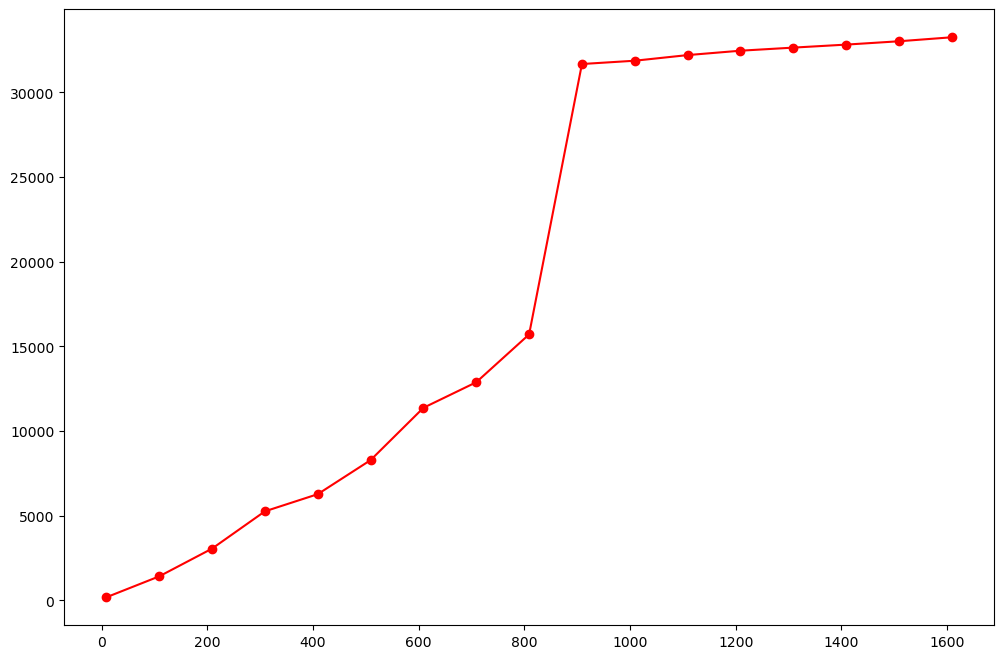

In [31]:
fig, ax = plt.subplots(figsize=(12,8))

x = []
y = []

for i in range( 9, polluteddata_arr.shape[0], 100 ):
    data = polluteddata_arr[:i]

    data = np.cov(data)

    eigen_val , eigen_vec = np.linalg.eigh( data )

    x.append(i)
    y.append(eigen_val[-1])
    
ax.plot( x , y, 'ro-' )

plt.show()

### We repeat what we did above, but this time for the second largest eigen value, to confirm our results

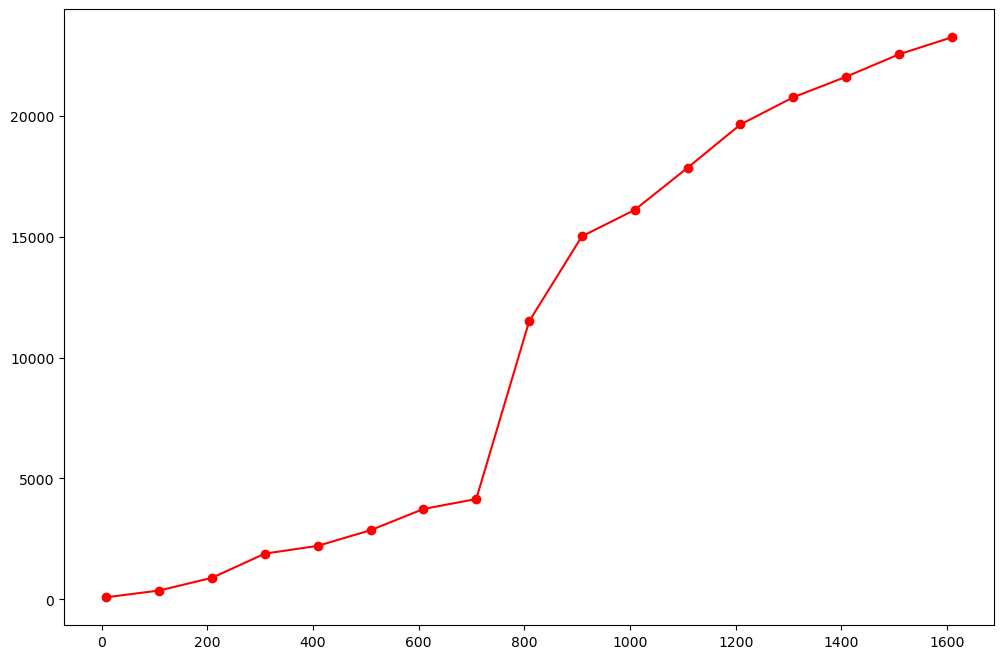

In [32]:
fig, ax = plt.subplots(figsize=(12,8))

x = []
y = []

for i in range( 9, polluteddata_arr.shape[0], 100 ):
    data = polluteddata_arr[:i]

    data = np.cov(data)

    eigen_val , eigen_vec = np.linalg.eigh( data )

    x.append(i)
    y.append(eigen_val[-2])
    
ax.plot( x , y, 'ro-' )

plt.show()